## Diabetes

First of all, download the dataset needed to solve this question from this [link](https://drive.google.com/file/d/1FQGwkOLaOsdUgSEEchyLTDQaNeekN4z9/view?usp=drive_link).

This dataset includes one target (dependent) variable, ``Outcome``, and multiple medical predictor (independent) factors. The patient's ``Age``, ``BMI``, ``Insulin Level``, ``Number of Pregnancies``, and other factors are examples of independent variables.

### Part 1 (EDA: Exploratory Data Analysis)

1. Read the dataset and display its first $10$ lines.

In [2]:
# Do it.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. How many data is there in each column of this dataset (**ignore missing data**) and what is the type of data in each column?

In [3]:
# Do it.
miss_data = df.isnull().sum()
print(miss_data)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


3. Get the ``mean``, ``standard deviation``, ``minimum``, ``first quartile``, ``median``, ``third quartile`` and ``maximum`` of the data in each column.

In [4]:
# Do it.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Explain with a logical reason that the minimum value of which of the columns of this dataset cannot be zero. Then, if there are zeros in these columns, change it to ``NaN`` (missing data) and finally, display the number of missing data in each column.

In [5]:
# Do it.
columns = ["Age", "BMI", "Insulin"]

df[columns] = df[columns].replace(0, np.nan)
print(miss_data)
df

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,0,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,NaN,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,NaN,30.1,0.349,47,1


5. Fill the missing data in the ``Glucose`` and ``BloodPressure`` columns with the average of the other data in each of these columns, and fill the missing data in the other columns with the average of the data in each of them.

In [13]:
# Do it.
mean_values = df.mean()
df['Glucose'].fillna(mean_values['Glucose'], inplace=True)
df['BloodPressure'].fillna(mean_values['BloodPressure'], inplace=True)

df.fillna(mean_values, inplace=True)

mean = df[["Glucose", "BloodPressure"]].mean()
mean

Glucose          120.894531
BloodPressure     69.105469
dtype: float64

6. Plot the scatter plot between each pair of columns of this dataset along with the histogram of each of these columns.

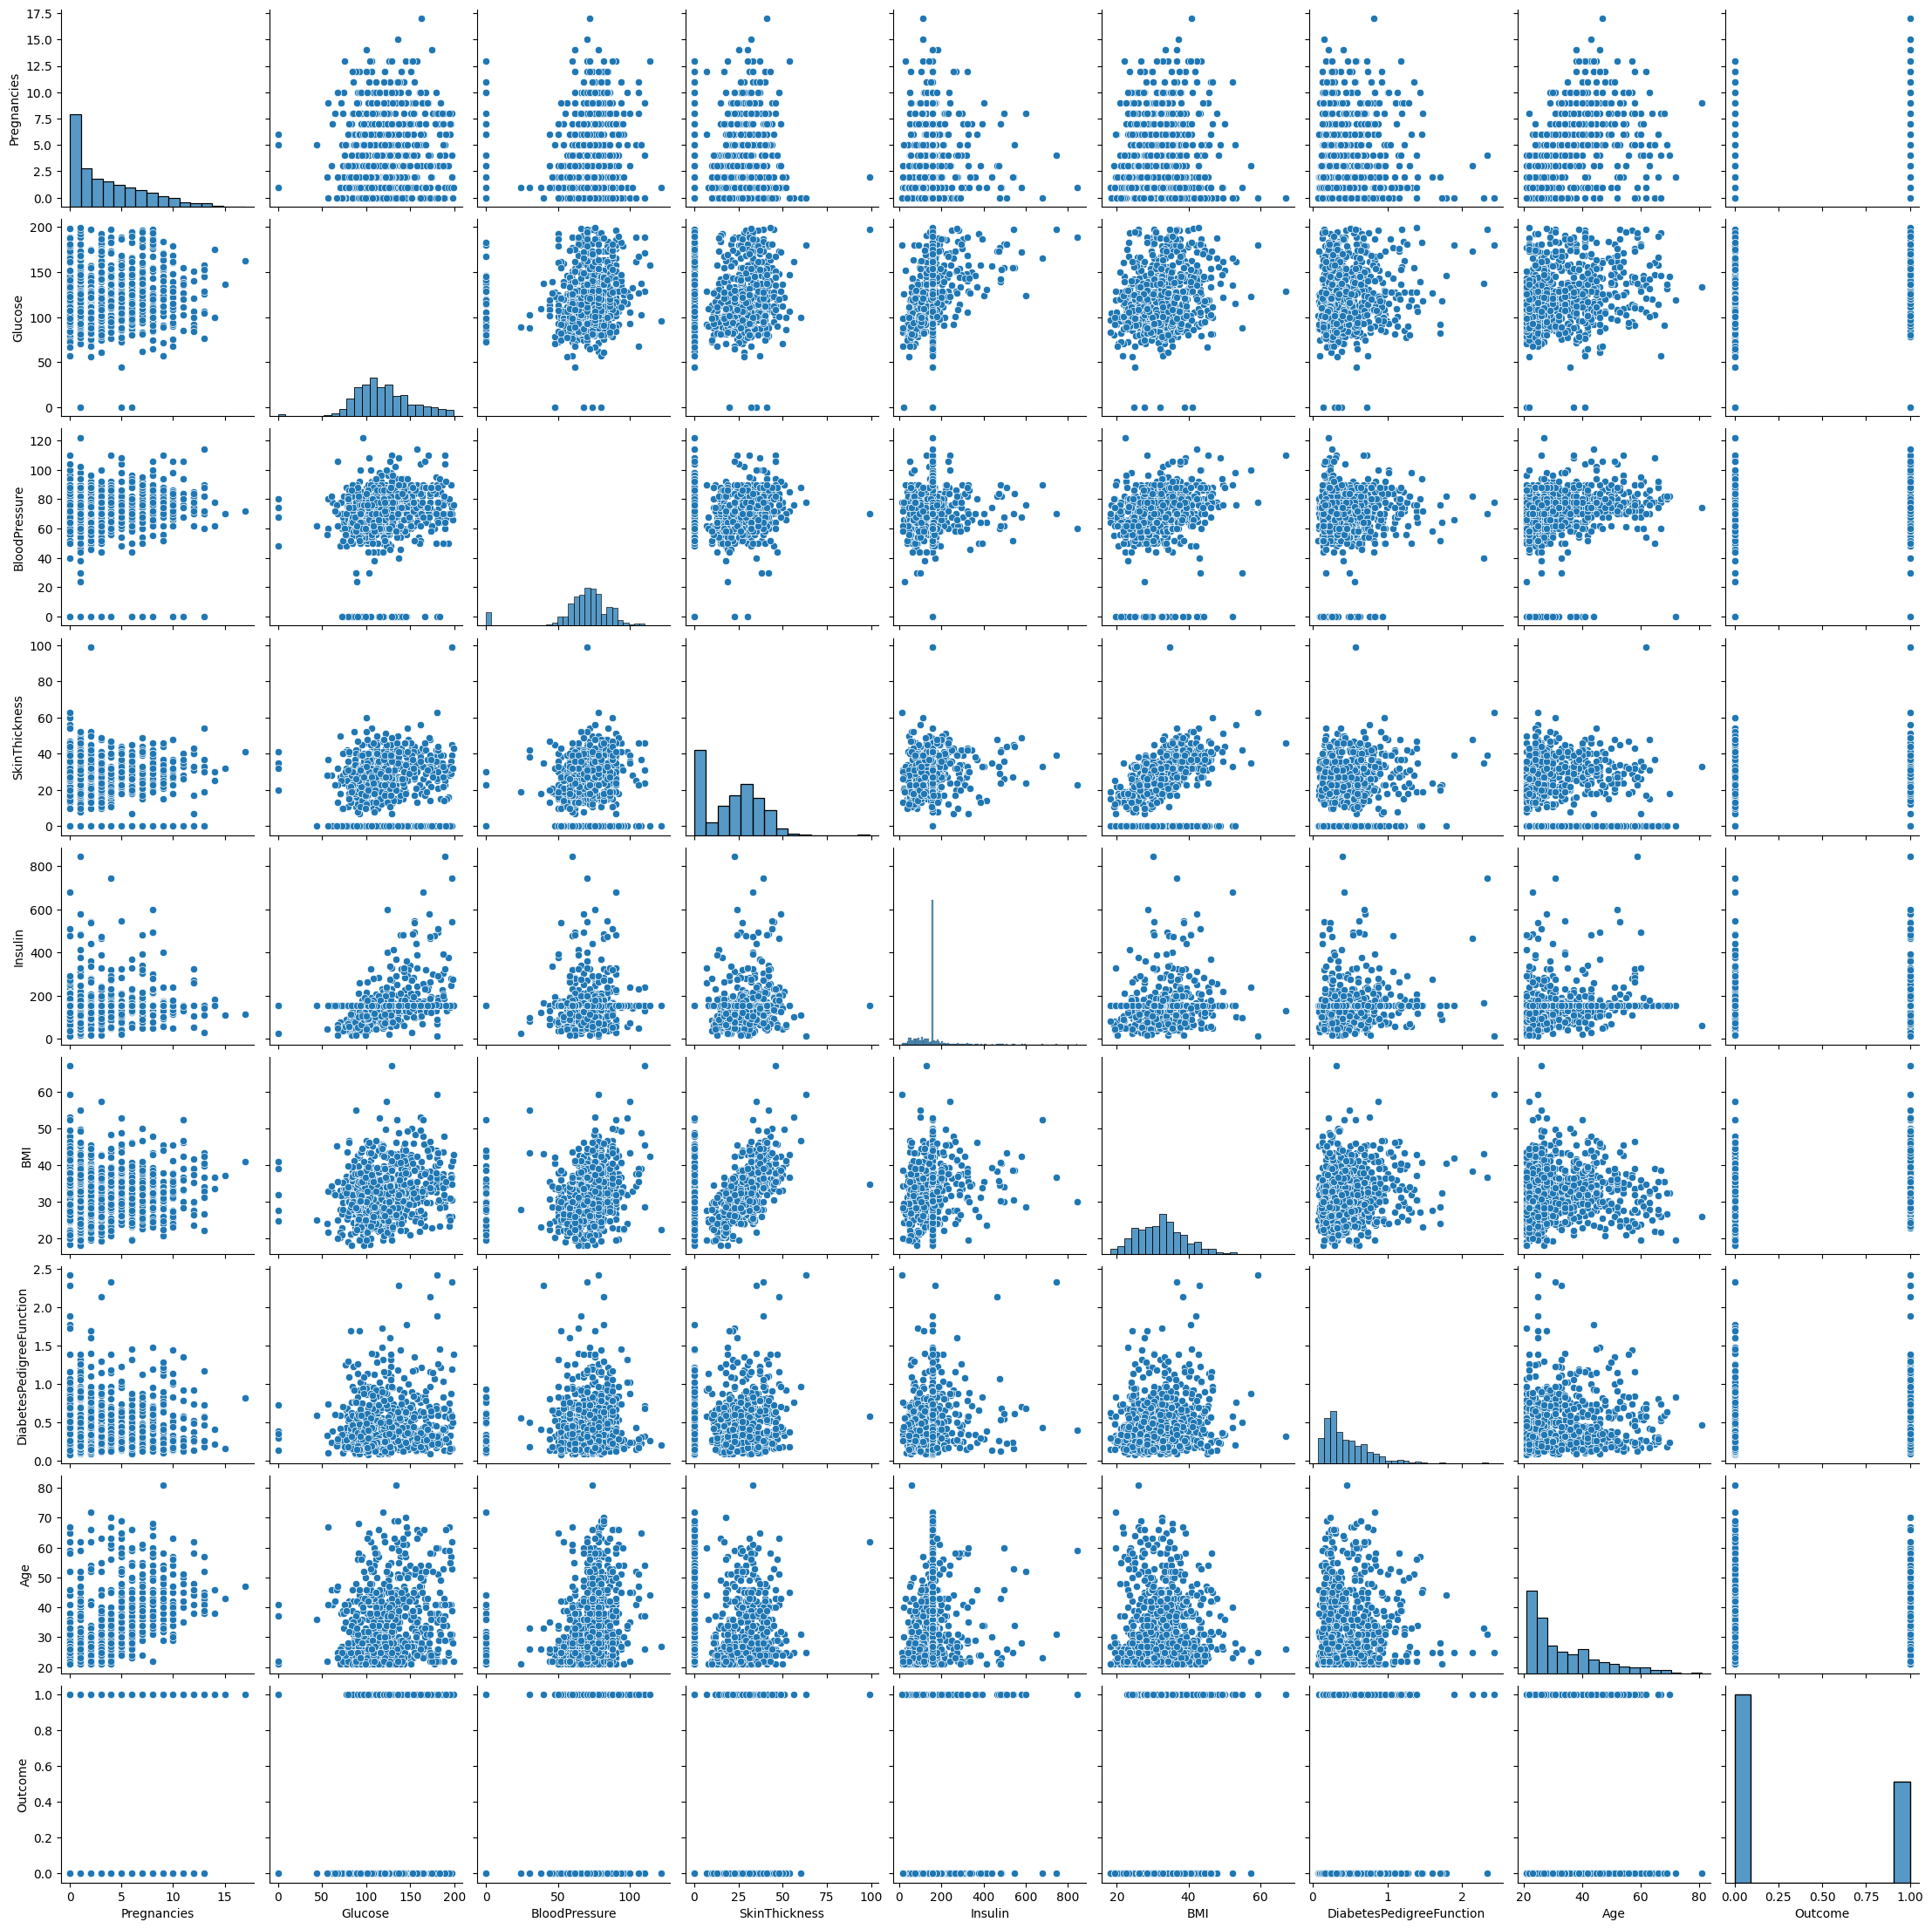

In [7]:
# Do it.
import seaborn as sns

# Plotting
sns.pairplot(df, diag_kind='hist')

### Part 2 (Machine Learning)

7. Is this a *classification* problem or a *regression* problem? Why? Please explain it.

چون outcome داریم و چندین feature factor و خروجی در نهایت یک مقدار دوتایی هستش که آیا بیمار دیابت دارد یا نه پس classification میشه چون در آخر باید دسته بندی بشن بیمار ها که دیابت دارند یا نه

8. Rescale all columns in the dataset (except ``Outcome`` column) using z-score normalization.

In [8]:
# Do it.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(
    df.drop('Outcome', axis=1)), columns=df.columns.drop('Outcome'))

df_scaled['Outcome'] = df['Outcome']

9. Consider the ``Outcome`` column as the target variable (``y``) and the other columns as feature matrix (``X``).

In [9]:
# Do it.
X = df_scaled.drop("Outcome", axis=1)
y = df_scaled["Outcome"]

10. Randomly separate $80\%$ of the data as train data (``X_train`` and ``y_train``) and another $20\%$ as test data (``X_test`` and ``y_test``).

In [10]:
# Do it.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

11. Using train data (``X_train`` and ``y_train``), build a model that obtains the value of the Outcome column from this dataset based on the values of other columns.

In [11]:
# Do it.

12. How do you check the performance (good or bad) of the model you made? Explain about this.

13. Evaluate the performance of your model using test data (``X_test`` and ``y_test``)

In [12]:
# Do it.

## Metrics

14. Among the metrics of ``precision``, ``recall`` and ``f1-score``, which metric is more important for us in diagnosing cancer? Why?